# Importing libraries

In [150]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score


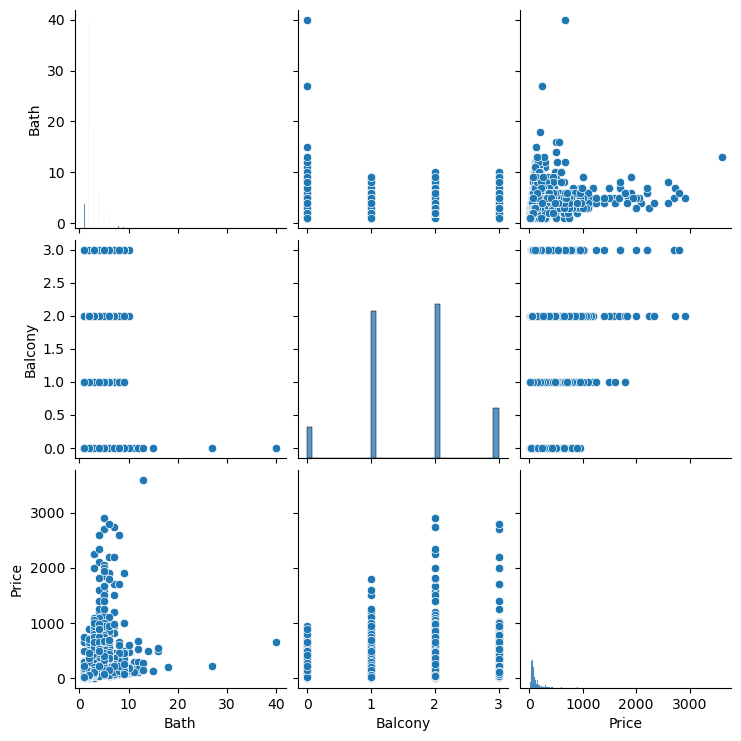

In [151]:
data=pd.read_csv(r'C:\Users\vvans\Downloads\House_Price_Bangalore.csv')
sns.pairplot(data)
plt.show()

In [152]:
data.head()

,area_type,availability,Location,BHK,society,Sqft,Bath,Balcony,Price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [153]:
data.shape


(13320, 9)

In [154]:
data.isnull().sum()

area_type          0
availability       0
Location           1
BHK               16
society         5502
Sqft               0
Bath              73
Balcony          609
Price              0
dtype: int64

In [155]:
data.drop(columns=['area_type','availability','society'],inplace=True)

In [156]:
data.head()

,Location,BHK,Sqft,Bath,Balcony,Price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [157]:
data.isna().sum()

Location      1
BHK          16
Sqft          0
Bath         73
Balcony     609
Price         0
dtype: int64

In [158]:
data['Location']=data['Location'].fillna(data['Location'].mode()[0])
data['BHK']=data['BHK'].fillna(data['BHK'].mode()[0])
data['Bath']=data['Bath'].fillna(data['Bath'].median())
data['Balcony']=data['Balcony'].fillna(data['Balcony'].median())


In [159]:
data.isnull().sum()

Location    0
BHK         0
Sqft        0
Bath        0
Balcony     0
Price       0
dtype: int64

In [160]:
data["Location"].unique()


array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [161]:
data['BHK']=data['BHK'].str.split().str.get(0).astype(int)

In [162]:
data["BHK"].unique()


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [163]:
data["Sqft"].unique()


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [164]:
data['Bath'].unique()


array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [165]:
data["Balcony"].unique()


array([1., 3., 2., 0.])

In [166]:
data.isnull().sum()

Location    0
BHK         0
Sqft        0
Bath        0
Balcony     0
Price       0
dtype: int64

In [167]:
data.head()

,Location,BHK,Sqft,Bath,Balcony,Price
0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Uttarahalli,3,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Kothanur,2,1200,2.0,1.0,51.00


In [168]:
data.isnull().sum()

Location    0
BHK         0
Sqft        0
Bath        0
Balcony     0
Price       0
dtype: int64

In [169]:
def to_num(x):
    x = str(x)
    if "-" in x:  # e.g. "5-6"
        low, high = x.split("-")
        return (float(low) + float(high)) / 2
    else:  # e.g. "4s ft"
        num=pd.to_numeric(''.join(ch for ch in x if ch.isdigit()), errors='coerce')
        return float(num)


In [170]:
data['Sqft']=data['Sqft'].apply(to_num)

In [171]:
data.head()

,Location,BHK,Sqft,Bath,Balcony,Price
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Kothanur,2,1200.0,2.0,1.0,51.00


In [172]:
data["Price"]=data["Price"]*100000

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  13320 non-null  object 
 1   BHK       13320 non-null  int64  
 2   Sqft      13320 non-null  float64
 3   Bath      13320 non-null  float64
 4   Balcony   13320 non-null  float64
 5   Price     13320 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 624.5+ KB


In [174]:
data.describe()

,BHK,Sqft,Bath,Balcony,Price
count,13320.000000,13320.000000,13320.000000,13320.000000,1.332000e+04
mean,2.802778,2396.821741,2.688814,1.603378,1.125656e+07
std,1.294496,12958.174572,1.338754,0.803067,1.489717e+07
min,1.000000,1.000000,1.000000,0.000000,8.000000e+05
25%,2.000000,1100.000000,2.000000,1.000000,5.000000e+06
50%,3.000000,1278.000000,2.000000,2.000000,7.200000e+06
75%,3.000000,1690.000000,3.000000,2.000000,1.200000e+07
max,43.000000,566584.000000,40.000000,3.000000,3.600000e+08


In [175]:
data.drop_duplicates()

,Location,BHK,Sqft,Bath,Balcony,Price
0,Electronic City Phase II,2,1056.0,2.0,1.0,3907000.0
1,Chikka Tirupathi,4,2600.0,5.0,3.0,12000000.0
2,Uttarahalli,3,1440.0,2.0,3.0,6200000.0
3,Lingadheeranahalli,3,1521.0,3.0,1.0,9500000.0
4,Kothanur,2,1200.0,2.0,1.0,5100000.0
...,...,...,...,...,...,...
13314,Green Glen Layout,3,1715.0,3.0,3.0,11200000.0
13315,Whitefield,5,3453.0,4.0,0.0,23100000.0
13316,Richards Town,4,3600.0,5.0,2.0,40000000.0
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,6000000.0


In [176]:
data["BHK"] = data["BHK"].astype(float)

In [177]:
data.head()

,Location,BHK,Sqft,Bath,Balcony,Price
0,Electronic City Phase II,2.0,1056.0,2.0,1.0,3907000.0
1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,12000000.0
2,Uttarahalli,3.0,1440.0,2.0,3.0,6200000.0
3,Lingadheeranahalli,3.0,1521.0,3.0,1.0,9500000.0
4,Kothanur,2.0,1200.0,2.0,1.0,5100000.0


In [178]:
data.describe()

,BHK,Sqft,Bath,Balcony,Price
count,13320.000000,13320.000000,13320.000000,13320.000000,1.332000e+04
mean,2.802778,2396.821741,2.688814,1.603378,1.125656e+07
std,1.294496,12958.174572,1.338754,0.803067,1.489717e+07
min,1.000000,1.000000,1.000000,0.000000,8.000000e+05
25%,2.000000,1100.000000,2.000000,1.000000,5.000000e+06
50%,3.000000,1278.000000,2.000000,2.000000,7.200000e+06
75%,3.000000,1690.000000,3.000000,2.000000,1.200000e+07
max,43.000000,566584.000000,40.000000,3.000000,3.600000e+08


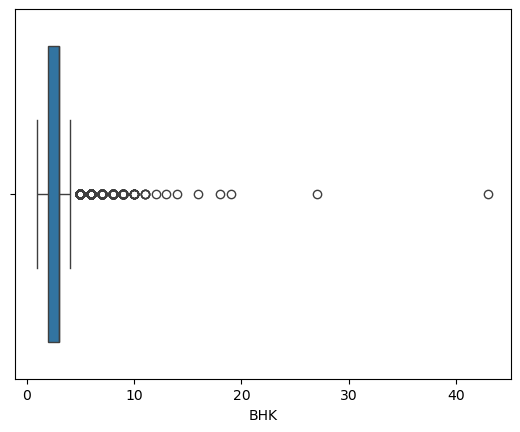

In [179]:
sns.boxplot(x="BHK",data=data)
plt.show()

In [180]:
q1=data["BHK"].quantile(0.25)
q3=data["BHK"].quantile(0.75)
IQR=q3-q1
min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)
min_range ,max_range


(np.float64(0.5), np.float64(4.5))

In [181]:
data = data[(data["BHK"] > min_range) & (data["BHK"] <= max_range)]

In [182]:
data.describe()

,BHK,Sqft,Bath,Balcony,Price
count,12474.000000,12474.0000,12474.000000,12474.000000,1.247400e+04
mean,2.563973,2311.8042,2.471541,1.590428,1.028219e+07
std,0.760477,11836.1053,0.885056,0.792336,1.248929e+07
min,1.000000,1.0000,1.000000,0.000000,8.000000e+05
25%,2.000000,1100.0000,2.000000,1.000000,4.850000e+06
50%,3.000000,1272.0000,2.000000,2.000000,6.895000e+06
75%,3.000000,1650.0000,3.000000,2.000000,1.100000e+07
max,4.000000,346786.0000,8.000000,3.000000,2.912000e+08


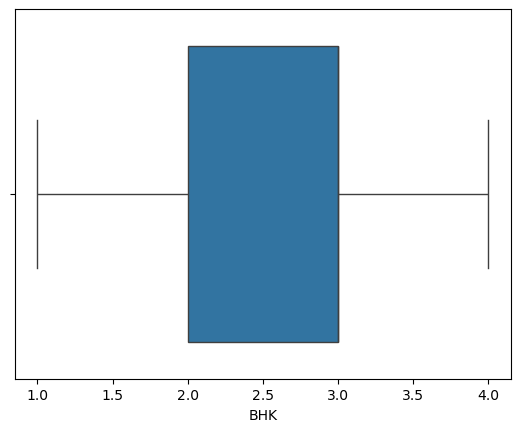

In [183]:
sns.boxplot(x="BHK",data=data)
plt.show()

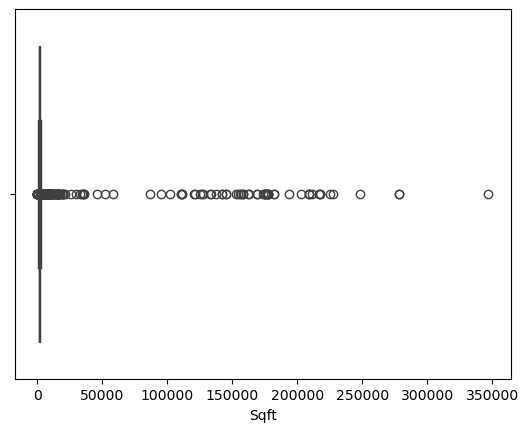

In [184]:
sns.boxplot(x="Sqft",data=data)
plt.show()

In [185]:
q1=data["Sqft"].quantile(0.25)
q3=data["Sqft"].quantile(0.75)
IQR=q3-q1
min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)
min_range ,max_range


(np.float64(275.0), np.float64(2475.0))

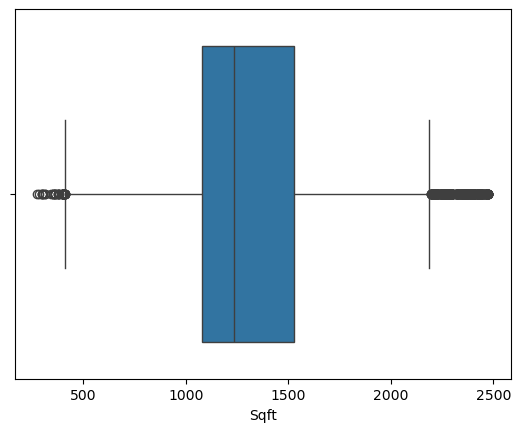

In [186]:
data=data[(data["Sqft"]>=min_range )& (data["Sqft"]<=max_range)]
sns.boxplot(x="Sqft",data=data)
plt.show()

In [187]:
data.describe()

,BHK,Sqft,Bath,Balcony,Price
count,11353.000000,11353.000000,11353.000000,11353.000000,1.135300e+04
mean,2.463226,1308.659745,2.331630,1.567163,8.097759e+06
std,0.693960,393.693053,0.726791,0.779010,6.190886e+06
min,1.000000,276.000000,1.000000,0.000000,8.000000e+05
25%,2.000000,1080.000000,2.000000,1.000000,4.700000e+06
50%,2.000000,1235.000000,2.000000,2.000000,6.500000e+06
75%,3.000000,1525.000000,3.000000,2.000000,9.500000e+06
max,4.000000,2475.000000,7.000000,3.000000,1.250000e+08


In [188]:
data.shape

(11353, 6)

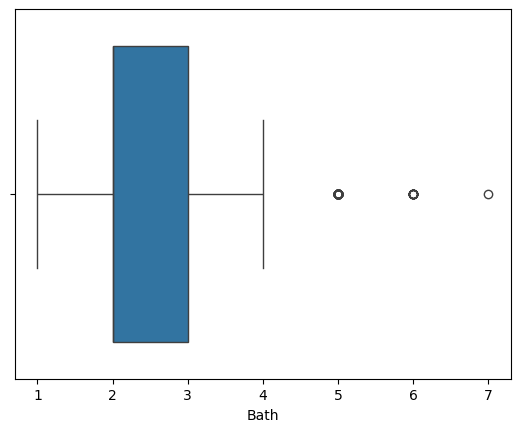

In [189]:
sns.boxplot(x="Bath",data=data)
plt.show()

In [190]:
q1=data["Bath"].quantile(0.25)
q3=data["Bath"].quantile(0.75)
IQR=q3-q1
min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)
min_range ,max_range


(np.float64(0.5), np.float64(4.5))

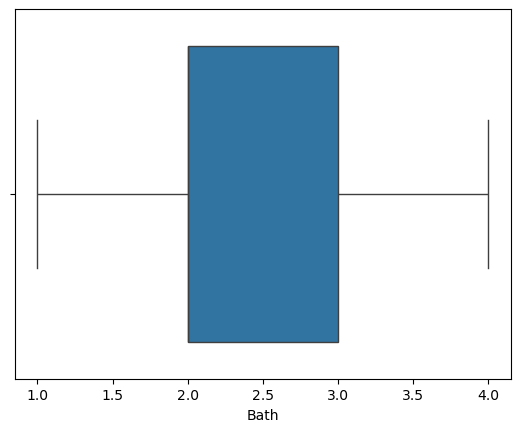

In [191]:
data=data[(data["Bath"]>=min_range )& (data["Bath"]<=max_range)]
sns.boxplot(x="Bath",data=data)
plt.show()

In [192]:
data.describe()

,BHK,Sqft,Bath,Balcony,Price
count,11254.000000,11254.000000,11254.000000,11254.000000,1.125400e+04
mean,2.450862,1304.944072,2.306735,1.565044,7.969878e+06
std,0.683580,388.221290,0.678545,0.778721,5.841002e+06
min,1.000000,276.000000,1.000000,0.000000,8.000000e+05
25%,2.000000,1080.000000,2.000000,1.000000,4.680000e+06
50%,2.000000,1232.500000,2.000000,2.000000,6.500000e+06
75%,3.000000,1519.750000,3.000000,2.000000,9.300000e+06
max,4.000000,2475.000000,4.000000,3.000000,1.063000e+08


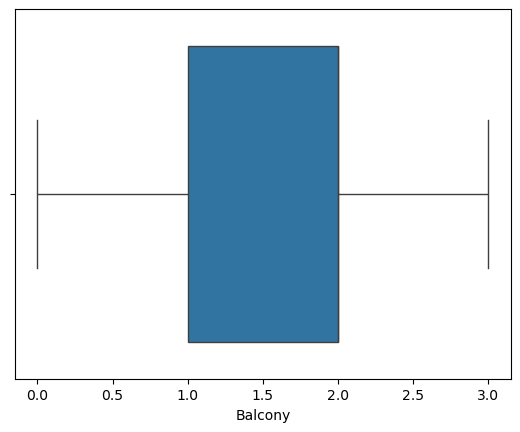

In [193]:
sns.boxplot(x="Balcony",data=data)
plt.show()

In [194]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_location = encoder.fit_transform(data[["Location"]]).toarray()
location_df = pd.DataFrame(encoded_location, columns=encoder.get_feature_names_out(["Location"]))
location_df

,Location_ Anekal,Location_ Banaswadi,Location_ Basavangudi,Location_ Bhoganhalli,Location_ Devarabeesana Halli,Location_ Devarachikkanahalli,Location_ Electronic City,Location_ Mysore Highway,Location_ Rachenahalli,Location_ Thanisandra,...,Location_mvj engineering college,Location_pavitra paradise,Location_poornaprajna layout,"Location_ravindra nagar, T.dasarahalli peenya",Location_rr nagar,Location_sapthagiri Layout,Location_sarjapura main road,Location_singapura paradise,Location_tc.palya,Location_whitefiled
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
data = pd.concat([data.drop("Location", axis=1).reset_index(drop=True),
                        location_df.reset_index(drop=True)], axis=1)
data

,BHK,Sqft,Bath,Balcony,Price,Location_ Anekal,Location_ Banaswadi,Location_ Basavangudi,Location_ Bhoganhalli,Location_ Devarabeesana Halli,...,Location_mvj engineering college,Location_pavitra paradise,Location_poornaprajna layout,"Location_ravindra nagar, T.dasarahalli peenya",Location_rr nagar,Location_sapthagiri Layout,Location_sarjapura main road,Location_singapura paradise,Location_tc.palya,Location_whitefiled
0,2.0,1056.0,2.0,1.0,3907000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,1440.0,2.0,3.0,6200000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1521.0,3.0,1.0,9500000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,1200.0,2.0,1.0,5100000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1170.0,2.0,1.0,3800000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11249,2.0,1262.0,2.0,2.0,4700000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11250,3.0,1345.0,2.0,1.0,5700000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11251,3.0,1715.0,3.0,3.0,11200000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11252,2.0,1141.0,2.0,1.0,6000000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [196]:
data.shape

(11254, 1142)

In [197]:
data.head()

,BHK,Sqft,Bath,Balcony,Price,Location_ Anekal,Location_ Banaswadi,Location_ Basavangudi,Location_ Bhoganhalli,Location_ Devarabeesana Halli,...,Location_mvj engineering college,Location_pavitra paradise,Location_poornaprajna layout,"Location_ravindra nagar, T.dasarahalli peenya",Location_rr nagar,Location_sapthagiri Layout,Location_sarjapura main road,Location_singapura paradise,Location_tc.palya,Location_whitefiled
0,2.0,1056.0,2.0,1.0,3907000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,1440.0,2.0,3.0,6200000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1521.0,3.0,1.0,9500000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,1200.0,2.0,1.0,5100000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1170.0,2.0,1.0,3800000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [198]:
data.describe()

,BHK,Sqft,Bath,Balcony,Price,Location_ Anekal,Location_ Banaswadi,Location_ Basavangudi,Location_ Bhoganhalli,Location_ Devarabeesana Halli,...,Location_mvj engineering college,Location_pavitra paradise,Location_poornaprajna layout,"Location_ravindra nagar, T.dasarahalli peenya",Location_rr nagar,Location_sapthagiri Layout,Location_sarjapura main road,Location_singapura paradise,Location_tc.palya,Location_whitefiled
count,11254.000000,11254.000000,11254.000000,11254.000000,1.125400e+04,11254.000000,11254.000000,11254.000000,11254.000000,11254.000000,...,11254.000000,11254.000000,11254.000000,11254.000000,11254.000000,11254.000000,11254.000000,11254.000000,11254.000000,11254.000000
mean,2.450862,1304.944072,2.306735,1.565044,7.969878e+06,0.000089,0.000089,0.000089,0.000089,0.000533,...,0.000089,0.000089,0.000089,0.000089,0.000089,0.000089,0.000089,0.000089,0.000355,0.000089
std,0.683580,388.221290,0.678545,0.778721,5.841002e+06,0.009426,0.009426,0.009426,0.009426,0.023085,...,0.009426,0.009426,0.009426,0.009426,0.009426,0.009426,0.009426,0.009426,0.018850,0.009426
min,1.000000,276.000000,1.000000,0.000000,8.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1080.000000,2.000000,1.000000,4.680000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1232.500000,2.000000,2.000000,6.500000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1519.750000,3.000000,2.000000,9.300000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,2475.000000,4.000000,3.000000,1.063000e+08,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [199]:
data.shape

(11254, 1142)

In [200]:
data.isnull().sum()

BHK                             0
Sqft                            0
Bath                            0
Balcony                         0
Price                           0
                               ..
Location_sapthagiri Layout      0
Location_sarjapura main road    0
Location_singapura paradise     0
Location_tc.palya               0
Location_whitefiled             0
Length: 1142, dtype: int64

In [201]:
x = data.drop('Price', axis=1)  # axis=1 is important!
y = data['Price']

# Initialize scaler
scaler = StandardScaler()

# Fit & transform only X
x_scaled = scaler.fit_transform(x)

# Convert back to DataFrame
x = pd.DataFrame(x_scaled, columns=x.columns, index=x.index)

x

,BHK,Sqft,Bath,Balcony,Location_ Anekal,Location_ Banaswadi,Location_ Basavangudi,Location_ Bhoganhalli,Location_ Devarabeesana Halli,Location_ Devarachikkanahalli,...,Location_mvj engineering college,Location_pavitra paradise,Location_poornaprajna layout,"Location_ravindra nagar, T.dasarahalli peenya",Location_rr nagar,Location_sapthagiri Layout,Location_sarjapura main road,Location_singapura paradise,Location_tc.palya,Location_whitefiled
0,-0.659589,-0.641271,-0.452069,-0.725637,-0.009427,-0.009427,-0.009427,-0.009427,-0.023096,-0.035292,...,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.018856,-0.009427
1,0.803362,0.347899,-0.452069,1.842792,-0.009427,-0.009427,-0.009427,-0.009427,-0.023096,-0.035292,...,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.018856,-0.009427
2,0.803362,0.556552,1.021738,-0.725637,-0.009427,-0.009427,-0.009427,-0.009427,-0.023096,-0.035292,...,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.018856,-0.009427
3,-0.659589,-0.270332,-0.452069,-0.725637,-0.009427,-0.009427,-0.009427,-0.009427,-0.023096,-0.035292,...,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.018856,-0.009427
4,-0.659589,-0.347611,-0.452069,-0.725637,-0.009427,-0.009427,-0.009427,-0.009427,-0.023096,-0.035292,...,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.018856,-0.009427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11249,-0.659589,-0.110622,-0.452069,0.558577,-0.009427,-0.009427,-0.009427,-0.009427,-0.023096,-0.035292,...,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.018856,-0.009427
11250,0.803362,0.103183,-0.452069,-0.725637,-0.009427,-0.009427,-0.009427,-0.009427,-0.023096,-0.035292,...,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.018856,-0.009427
11251,0.803362,1.056290,1.021738,1.842792,-0.009427,-0.009427,-0.009427,-0.009427,-0.023096,-0.035292,...,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.018856,-0.009427
11252,-0.659589,-0.422314,-0.452069,-0.725637,-0.009427,-0.009427,-0.009427,-0.009427,-0.023096,-0.035292,...,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.018856,-0.009427


In [202]:
y

0         3907000.0
1         6200000.0
2         9500000.0
3         5100000.0
4         3800000.0
            ...    
11249     4700000.0
11250     5700000.0
11251    11200000.0
11252     6000000.0
11253     1700000.0
Name: Price, Length: 11254, dtype: float64

In [203]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [204]:
# Linear Regression
linear = LinearRegression()
linear.fit(x_train, y_train)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)


C:\Users\vvans\OneDrive\Attachments\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.699e+16, tolerance: 3.156e+13
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [205]:
models = {'Linear': linear, 'Ridge': ridge, 'Lasso': lasso}

for name, model in models.items():
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    print(f"{name}:")
    print(f"  Train R²: {r2_score(y_train, y_train_pred):.3f}")
    print(f"  Test  R²: {r2_score(y_test, y_test_pred):.3f}")
    print()


Linear:
  Train R²: 0.662
  Test  R²: 0.519

Ridge:
  Train R²: 0.662
  Test  R²: 0.519

Lasso:
  Train R²: 0.662
  Test  R²: 0.519



In [213]:
 data = {
    "Location": "Gottigere",
    "BHK": 2,
    "Sqft": 1100,
    "Bath": 2,
    "Balcony": 2,
    
};

In [214]:
data = pd.DataFrame([data])


In [215]:
encoded_location = encoder.transform(data[["Location"]]).toarray()
location_df = pd.DataFrame(encoded_location, columns=encoder.get_feature_names_out(["Location"]))
location_df

,Location_ Anekal,Location_ Banaswadi,Location_ Basavangudi,Location_ Bhoganhalli,Location_ Devarabeesana Halli,Location_ Devarachikkanahalli,Location_ Electronic City,Location_ Mysore Highway,Location_ Rachenahalli,Location_ Thanisandra,...,Location_mvj engineering college,Location_pavitra paradise,Location_poornaprajna layout,"Location_ravindra nagar, T.dasarahalli peenya",Location_rr nagar,Location_sapthagiri Layout,Location_sarjapura main road,Location_singapura paradise,Location_tc.palya,Location_whitefiled
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [216]:
data = pd.concat([data.drop("Location", axis=1).reset_index(drop=True),
                        location_df.reset_index(drop=True)], axis=1)
data

,BHK,Sqft,Bath,Balcony,Location_ Anekal,Location_ Banaswadi,Location_ Basavangudi,Location_ Bhoganhalli,Location_ Devarabeesana Halli,Location_ Devarachikkanahalli,...,Location_mvj engineering college,Location_pavitra paradise,Location_poornaprajna layout,"Location_ravindra nagar, T.dasarahalli peenya",Location_rr nagar,Location_sapthagiri Layout,Location_sarjapura main road,Location_singapura paradise,Location_tc.palya,Location_whitefiled
0,2,1100,2,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [217]:
scaled = scaler.transform(data)

data = pd.DataFrame(scaled, columns=data.columns, index=data.index)
data

,BHK,Sqft,Bath,Balcony,Location_ Anekal,Location_ Banaswadi,Location_ Basavangudi,Location_ Bhoganhalli,Location_ Devarabeesana Halli,Location_ Devarachikkanahalli,...,Location_mvj engineering college,Location_pavitra paradise,Location_poornaprajna layout,"Location_ravindra nagar, T.dasarahalli peenya",Location_rr nagar,Location_sapthagiri Layout,Location_sarjapura main road,Location_singapura paradise,Location_tc.palya,Location_whitefiled
0,-0.659589,-0.527929,-0.452069,0.558577,-0.009427,-0.009427,-0.009427,-0.009427,-0.023096,-0.035292,...,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.009427,-0.018856,-0.009427


In [236]:

predicted_price = linear.predict(data)
print(predicted_price[0])

4122900.9002540195


In [229]:
joblib.dump(scaler,'scaler.sav')    

['scaler.sav']

In [230]:
joblib.dump(linear,'linear.sav')


['linear.sav']

In [231]:
joblib.dump(encoder,'encoder.sav')  #

['encoder.sav']